In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the fuzzy variables (input and output)
pH = ctrl.Antecedent(np.arange(0, 14, 1), 'pH')
turbidity = ctrl.Antecedent(np.arange(0, 101, 1), 'turbidity')
dissolved_oxygen = ctrl.Antecedent(np.arange(0, 11, 1), 'dissolved_oxygen')
filtration = ctrl.Consequent(np.arange(0, 101, 1), 'filtration')
neutralizer = ctrl.Consequent(np.arange(0, 101, 1), 'neutralizer')
aeration = ctrl.Consequent(np.arange(0, 101, 1), 'aeration')

In [5]:
# Define the membership functions for pH
pH['low'] = fuzz.trimf(pH.universe, [0, 0, 7])
pH['neutral'] = fuzz.trimf(pH.universe, [6, 7, 8])
pH['high'] = fuzz.trimf(pH.universe, [7, 14, 14])


In [6]:
# Define the membership functions for turbidity
turbidity['low'] = fuzz.trimf(turbidity.universe, [0, 0, 50])
turbidity['medium'] = fuzz.trimf(turbidity.universe, [25, 50, 75])
turbidity['high'] = fuzz.trimf(turbidity.universe, [50, 100, 100])

In [7]:
# Define the membership functions for dissolved oxygen
dissolved_oxygen['low'] = fuzz.trimf(dissolved_oxygen.universe, [0, 0, 5])
dissolved_oxygen['medium'] = fuzz.trimf(dissolved_oxygen.universe, [3, 5, 7])
dissolved_oxygen['high'] = fuzz.trimf(dissolved_oxygen.universe, [5, 10, 10])

In [8]:

# Define the membership functions for filtration
filtration['low'] = fuzz.trimf(filtration.universe, [0, 0, 50])
filtration['medium'] = fuzz.trimf(filtration.universe, [25, 50, 75])
filtration['high'] = fuzz.trimf(filtration.universe, [50, 100, 100])

In [9]:

# Define the membership functions for neutralizer
neutralizer['low'] = fuzz.trimf(neutralizer.universe, [0, 0, 50])
neutralizer['medium'] = fuzz.trimf(neutralizer.universe, [25, 50, 75])
neutralizer['high'] = fuzz.trimf(neutralizer.universe, [50, 100, 100])

In [10]:

# Define the membership functions for aeration
aeration['low'] = fuzz.trimf(aeration.universe, [0, 0, 50])
aeration['medium'] = fuzz.trimf(aeration.universe, [25, 50, 75])
aeration['high'] = fuzz.trimf(aeration.universe, [50, 100, 100])

In [11]:

# Define the fuzzy rules
rules = [
    ctrl.Rule(pH['low'] & turbidity['high'], (filtration['high'], neutralizer['high'])),
    ctrl.Rule(pH['neutral'] & turbidity['medium'], filtration['medium']),
    ctrl.Rule(dissolved_oxygen['low'], aeration['high']),
    ctrl.Rule(pH['high'] & turbidity['low'], neutralizer['low']),
    ctrl.Rule(pH['neutral'] & turbidity['high'], filtration['high']),
    ctrl.Rule(dissolved_oxygen['high'], aeration['low']),
    ctrl.Rule(turbidity['low'] & dissolved_oxygen['medium'], (filtration['low'], aeration['medium'])),
    ctrl.Rule(pH['high'] & dissolved_oxygen['low'], (neutralizer['high'], aeration['high'])),
    ctrl.Rule(pH['low'] & dissolved_oxygen['high'], (neutralizer['low'], aeration['low'])),
    ctrl.Rule(pH['neutral'] & dissolved_oxygen['medium'], (filtration['medium'], neutralizer['medium'], aeration['medium'])),
    ctrl.Rule(pH['low'] & turbidity['medium'] & dissolved_oxygen['medium'], (filtration['medium'], neutralizer['medium'], aeration['medium'])),
    ctrl.Rule(pH['high'] & turbidity['high'] & dissolved_oxygen['low'], (filtration['high'], neutralizer['high'], aeration['high']))
]

In [12]:
# Create the control system
water_quality_control = ctrl.ControlSystem(rules)
water_quality_simulation = ctrl.ControlSystemSimulation(water_quality_control)

In [14]:
# Simulate the control system with input values
input_pH = 6.0
input_turbidity = 80
input_dissolved_oxygen = 4

water_quality_simulation.input['pH'] = input_pH
water_quality_simulation.input['turbidity'] = input_turbidity
water_quality_simulation.input['dissolved_oxygen'] = input_dissolved_oxygen

water_quality_simulation.compute()

In [15]:
# Print the result
print(f"Input pH: {input_pH}")
print(f"Input turbidity: {input_turbidity} NTU")
print(f"Input dissolved oxygen: {input_dissolved_oxygen} mg/L")
print(f"Output filtration: {water_quality_simulation.output['filtration']}%")
print(f"Output neutralizer: {water_quality_simulation.output['neutralizer']}%")
print(f"Output aeration: {water_quality_simulation.output['aeration']}%")

Input pH: 6.0
Input turbidity: 80 NTU
Input dissolved oxygen: 4 mg/L
Output filtration: 76.73992673992667%
Output neutralizer: 76.73992673992667%
Output aeration: 77.4074074074074%


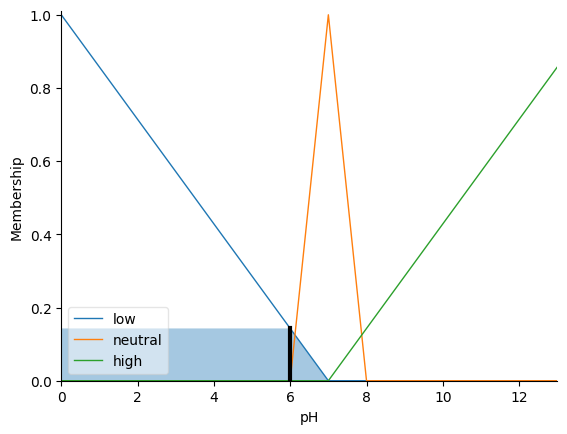

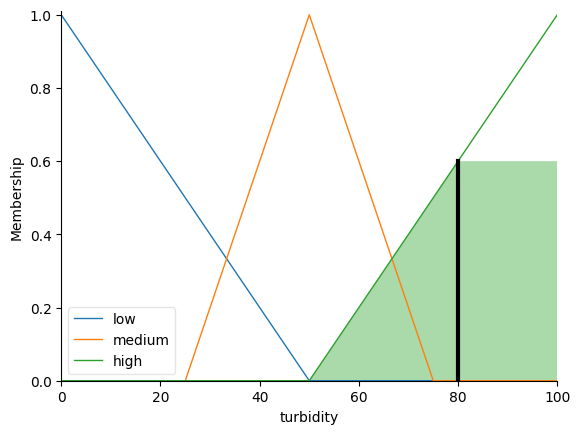

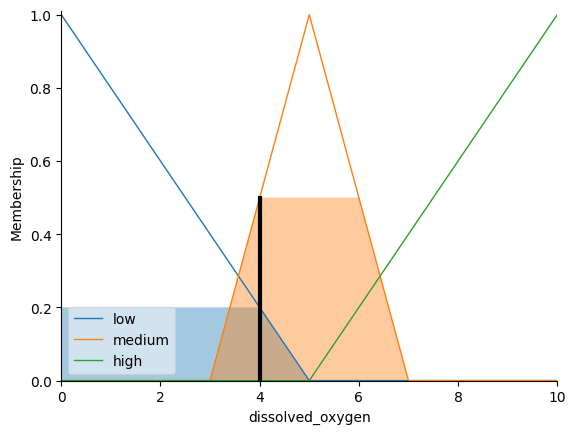

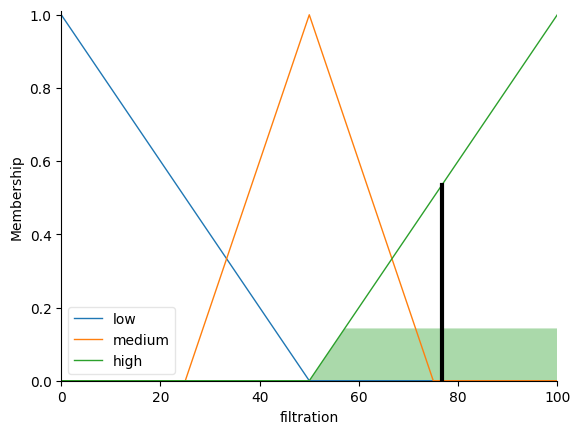

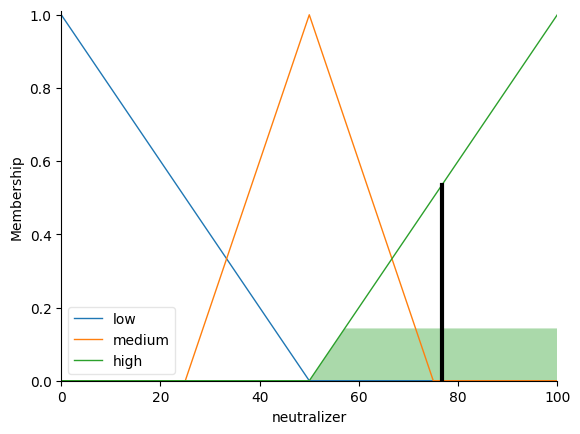

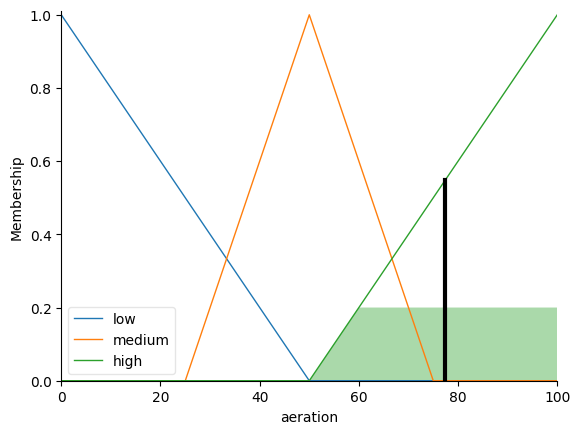

In [16]:
# Visualize the results
pH.view(sim=water_quality_simulation)
turbidity.view(sim=water_quality_simulation)
dissolved_oxygen.view(sim=water_quality_simulation)
filtration.view(sim=water_quality_simulation)
neutralizer.view(sim=water_quality_simulation)
aeration.view(sim=water_quality_simulation)